In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\supev\AppData\Local\Temp\ipykernel_23032\1261316105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], kde=False, bins=40)


<Axes: xlabel='total_bill'>

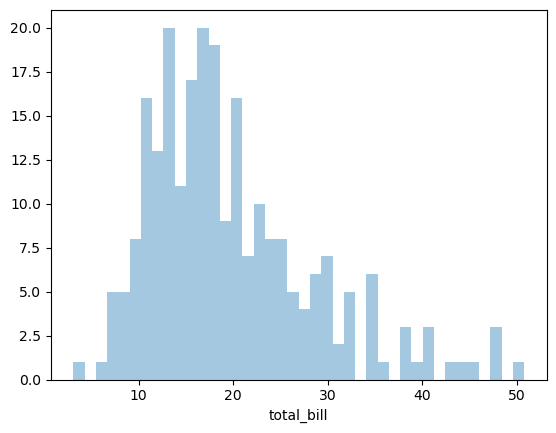

In [6]:
sns.distplot(tips['total_bill'], kde=False, bins=40)

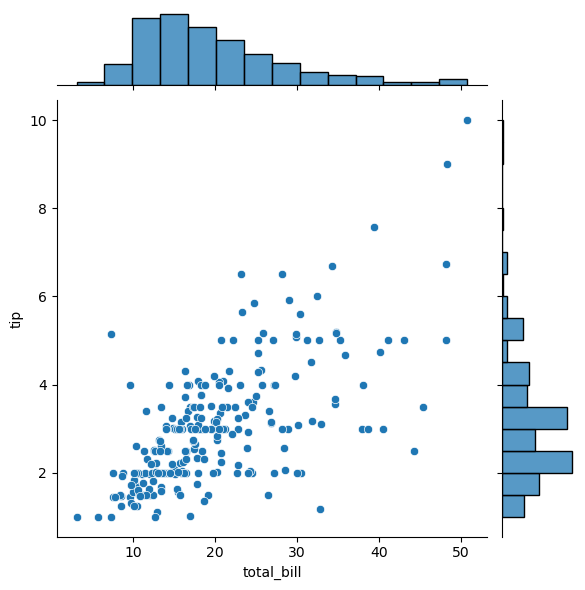

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips)
#  kind='kde', 'hex', 'reg'

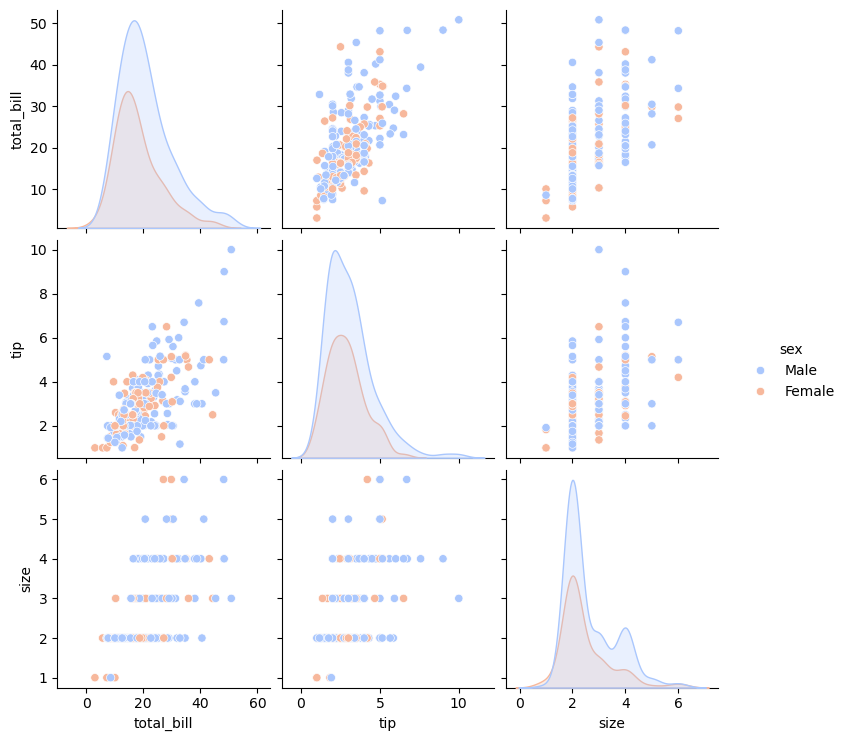

In [8]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

<Axes: xlabel='total_bill'>

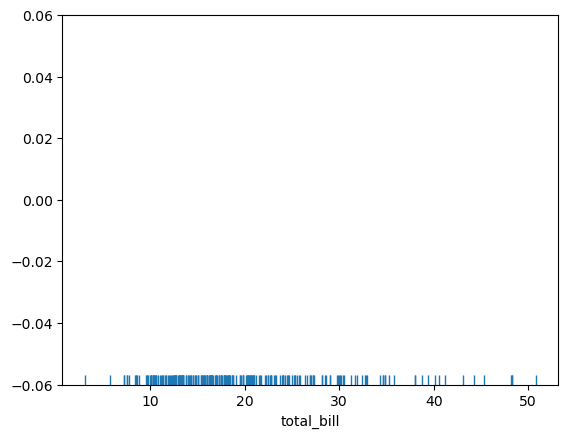

In [9]:
sns.rugplot(tips['total_bill'])

(0.0, 1.0)

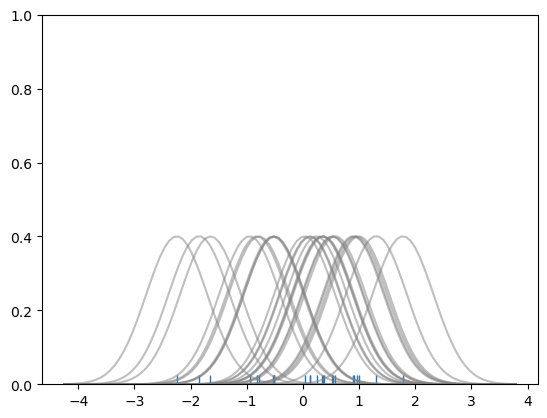

In [10]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

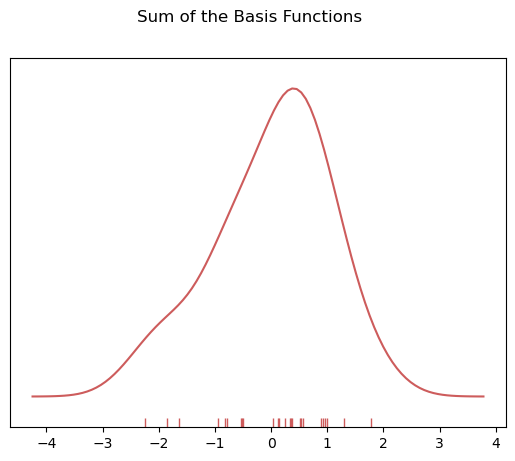

In [11]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

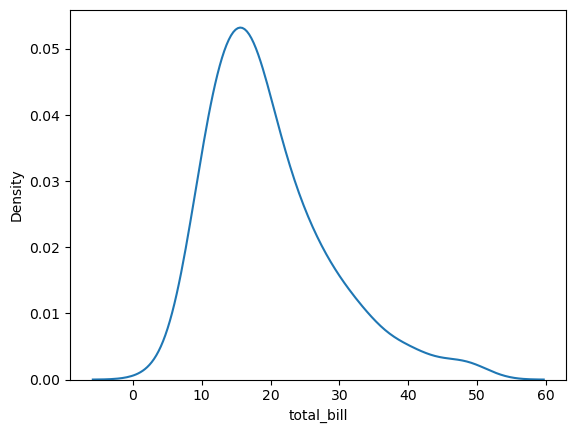

In [12]:
sns.kdeplot(tips['total_bill'])

## CAtegorical Plots

In [14]:
import numpy as np
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

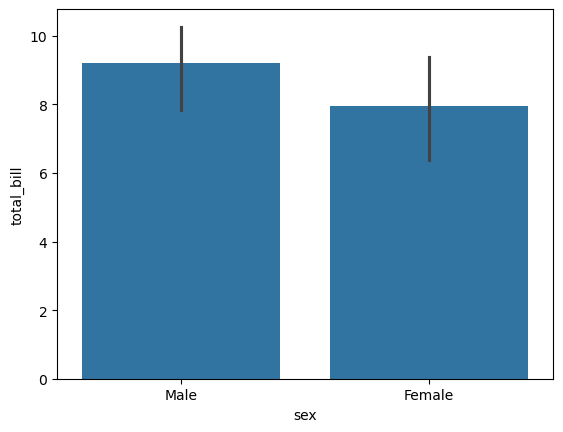

In [15]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

<Axes: xlabel='sex', ylabel='count'>

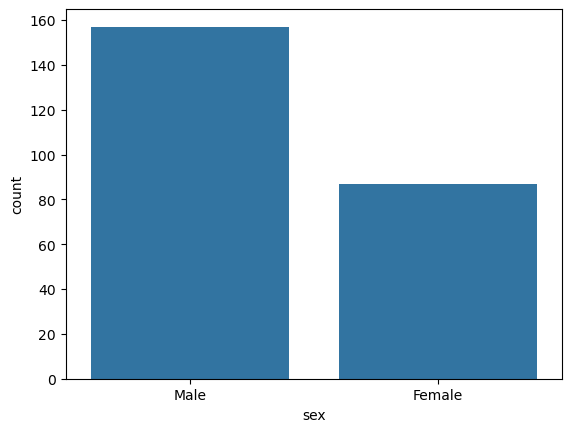

In [16]:
sns.countplot(x='sex', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

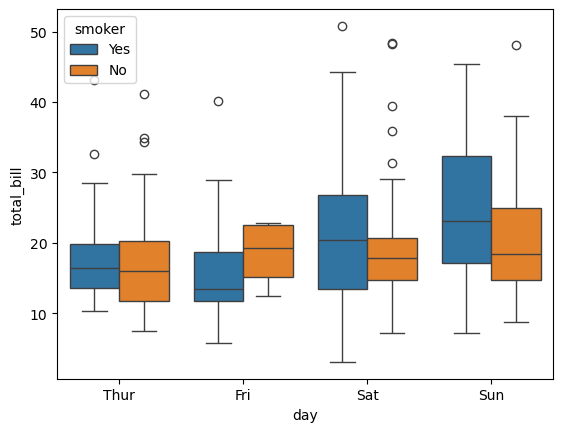

In [17]:
sns.boxplot(x='day', y='total_bill',data=tips, hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

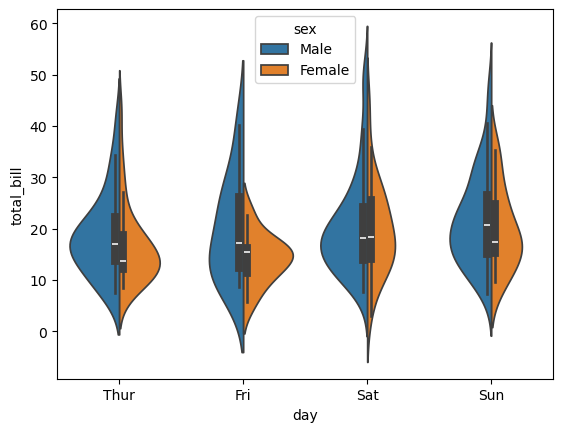

In [18]:
sns.violinplot(x='day', y='total_bill',data=tips, hue='sex', split=True)

<Axes: xlabel='day', ylabel='total_bill'>

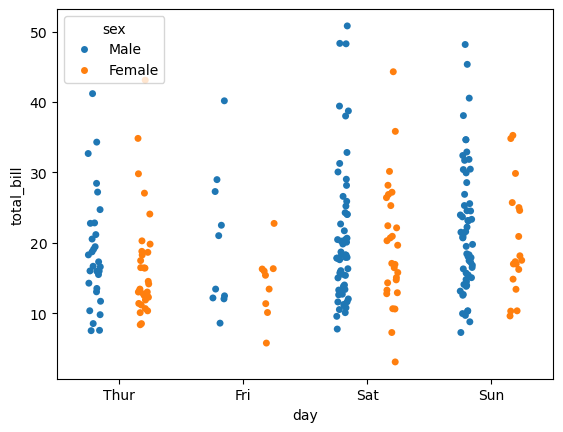

In [19]:
sns.stripplot(x='day', y='total_bill',data=tips, jitter=True, hue='sex', dodge=True)

<Axes: xlabel='day', ylabel='total_bill'>

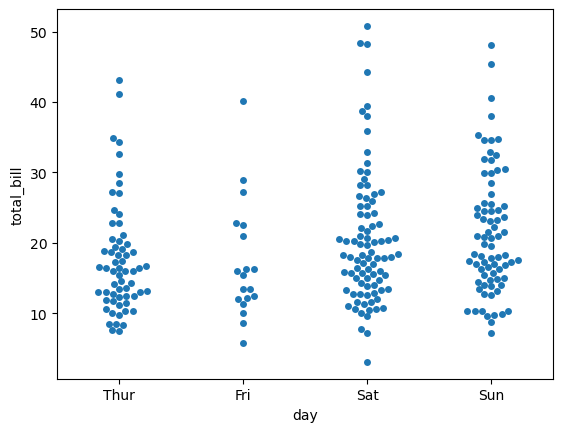

In [20]:
sns.swarmplot(x='day',y='total_bill',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

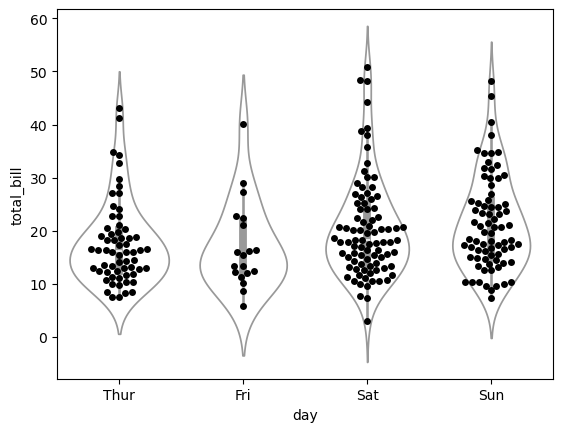

In [21]:
sns.violinplot(x='day',y='total_bill',data=tips, color='white')
sns.swarmplot(x='day',y='total_bill',data=tips, color='black')

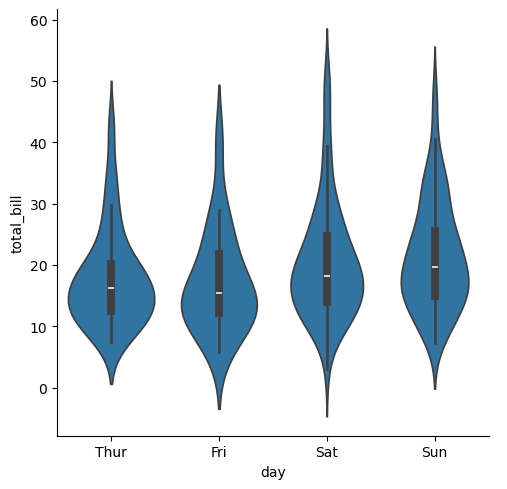

In [22]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin')

In [23]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [25]:
tc = tips.corr(numeric_only=True)

In [26]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

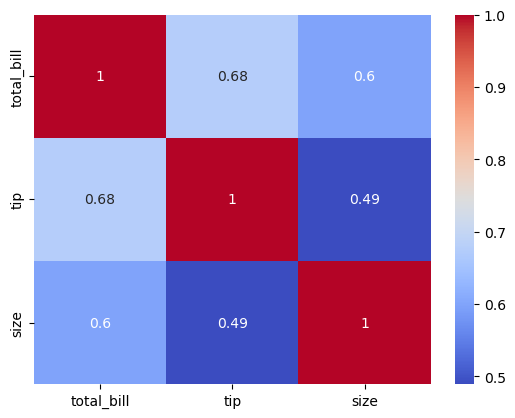

In [27]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [28]:
fp = flights.pivot_table(index='month', columns='year', values='passengers', observed=False)

<Axes: xlabel='year', ylabel='month'>

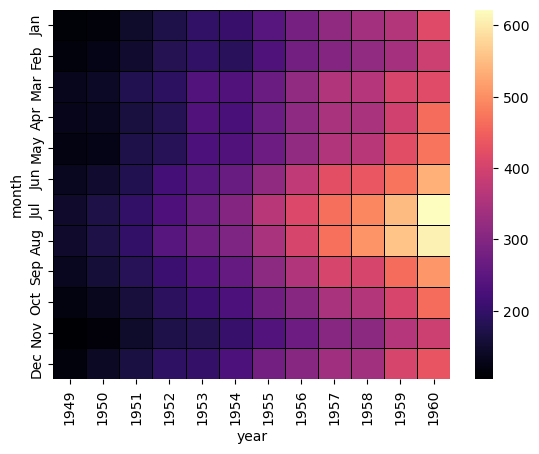

In [29]:
sns.heatmap(fp, cmap='magma', linecolor="black", linewidth=0.5)

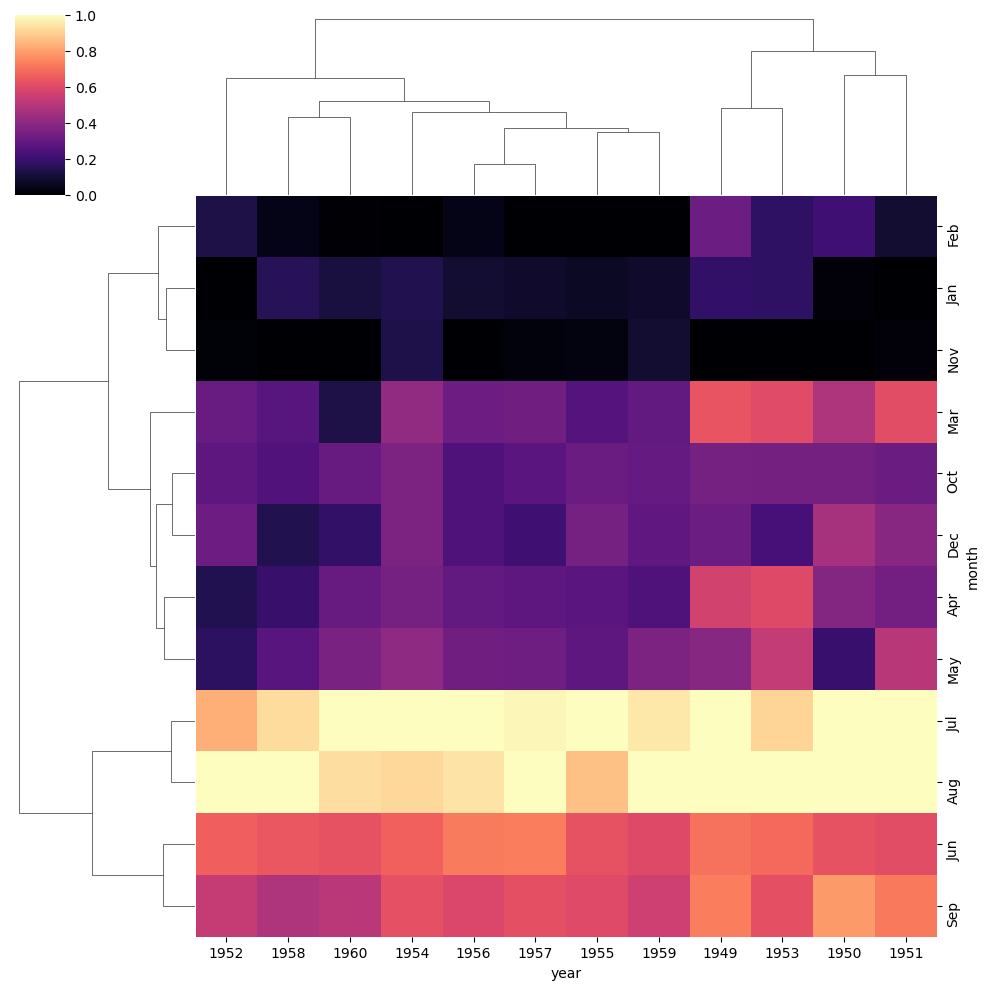

In [59]:
sns.clustermap(fp, cmap='magma',standard_scale=1)

In [63]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


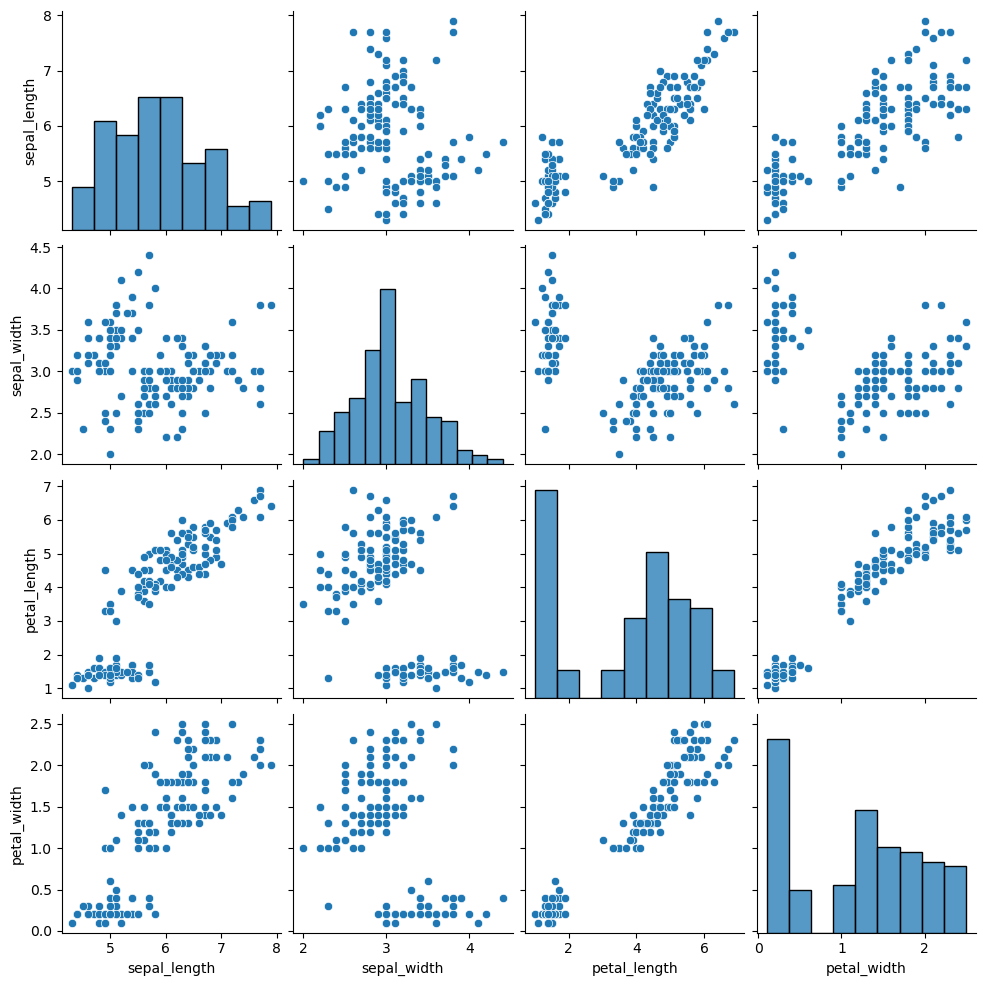

In [85]:
sns.pairplot(iris)

C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, colo

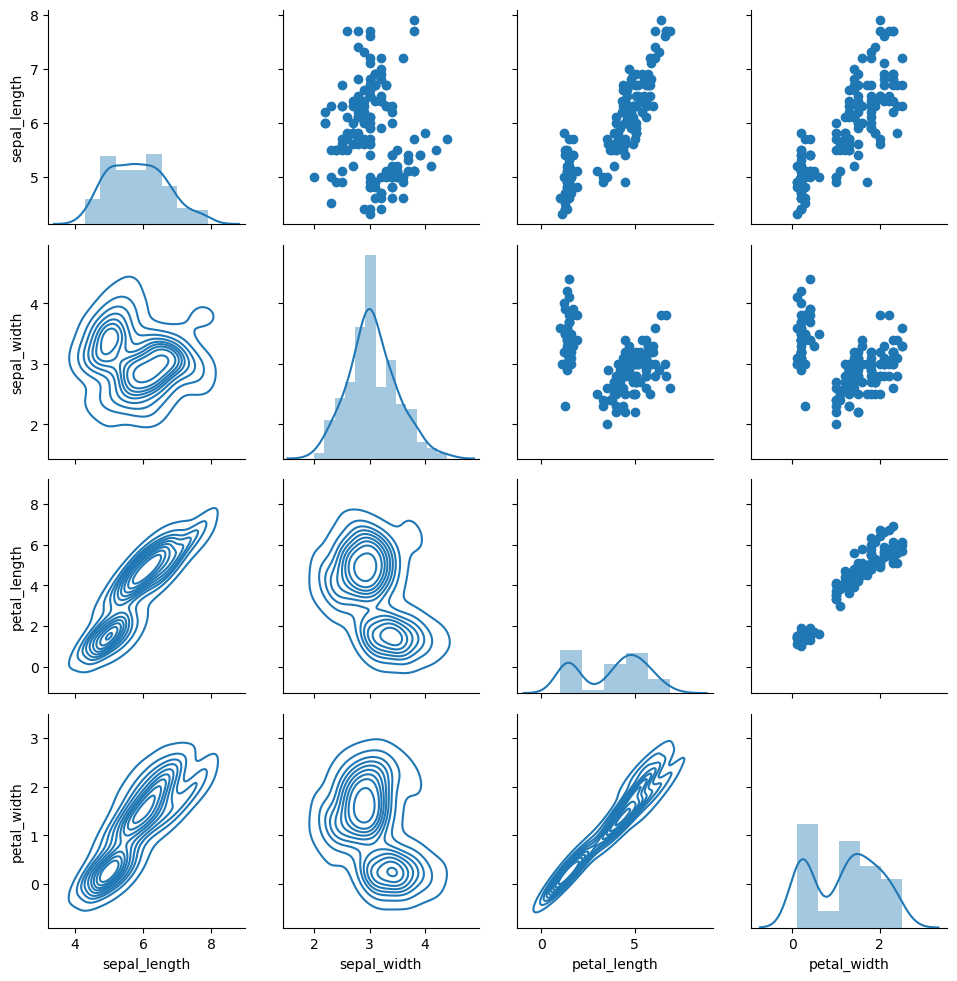

In [89]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [93]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\ProgramData\Anaconda3\Lib\s

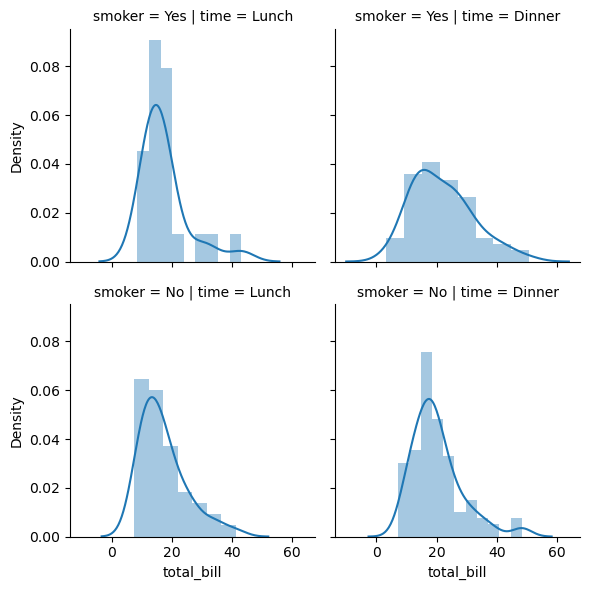

In [99]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(sns.distplot, 'total_bill')

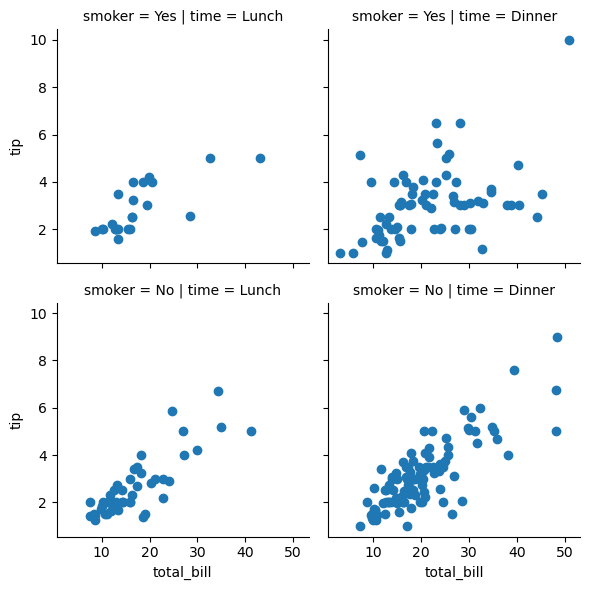

In [105]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

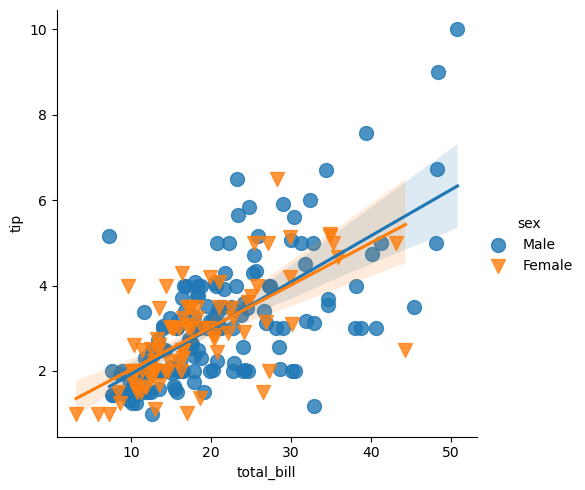

In [115]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'], scatter_kws={'s':100})

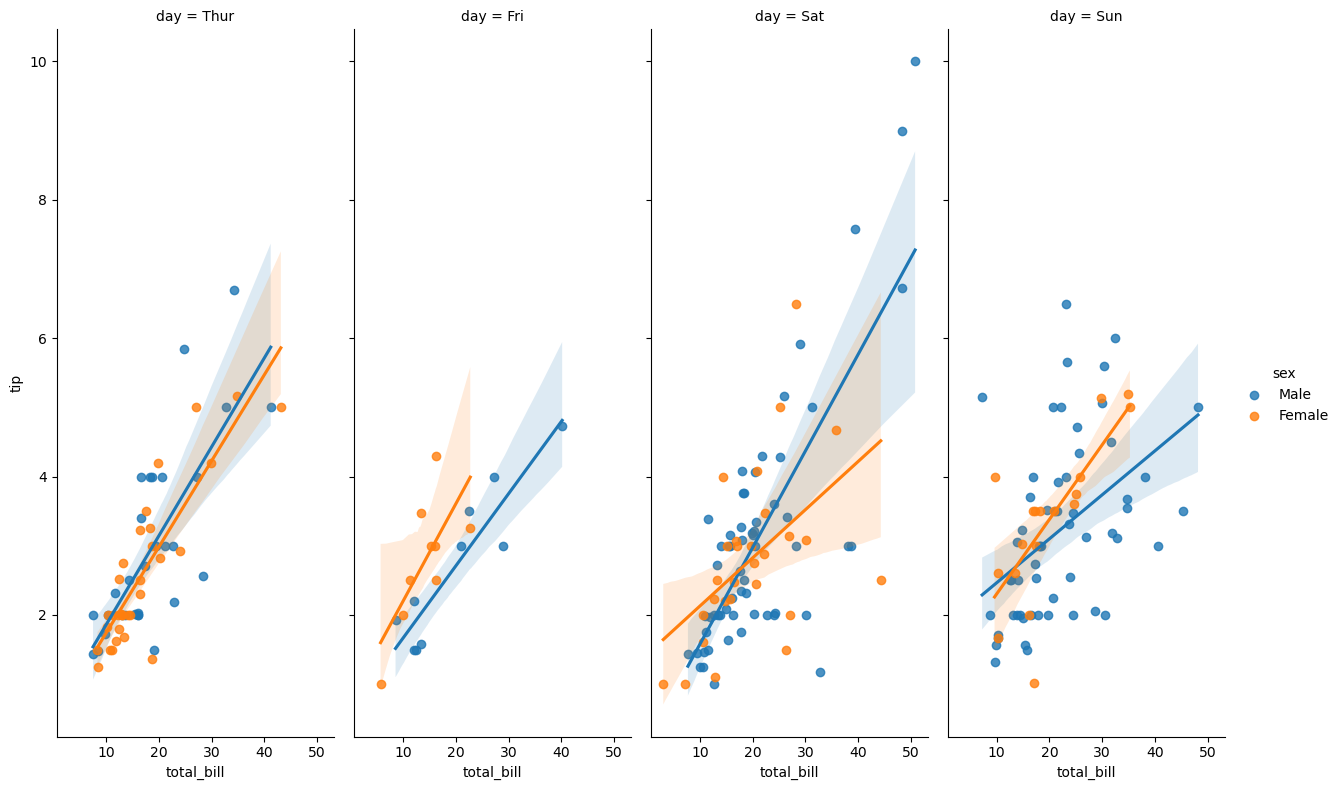

In [139]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex',aspect=0.39, height=8)

In [143]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


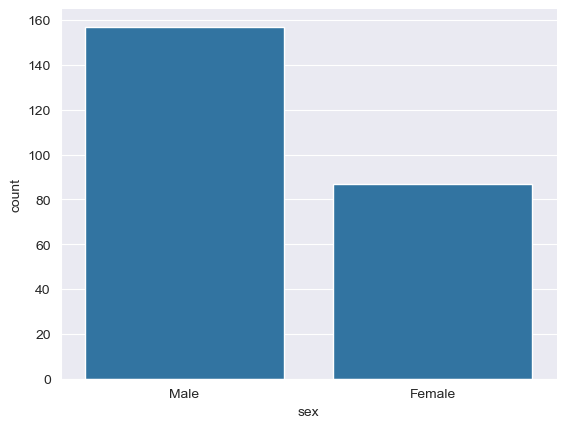

In [177]:
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)
sns.despine()

<Axes: xlabel='sex', ylabel='count'>

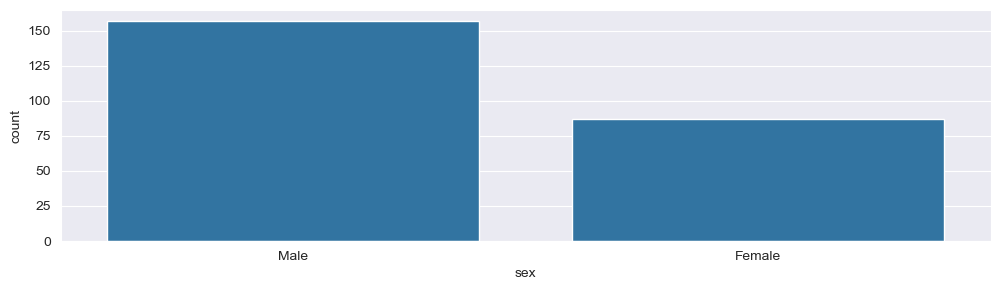

In [183]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

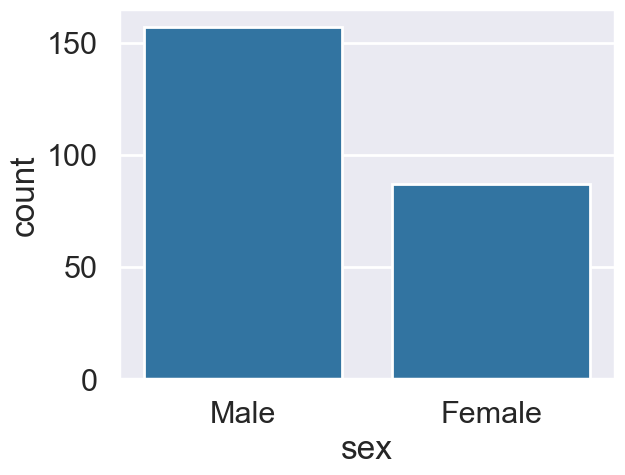

In [199]:
sns.set_context('poster', font_scale=1)
# set contexts: notebook, poster
sns.countplot(x='sex',data=tips)

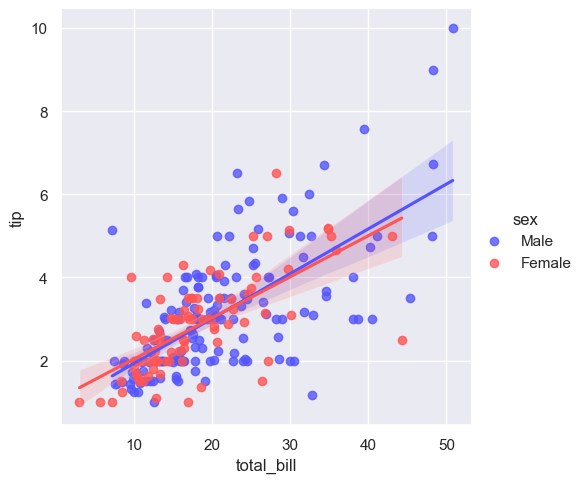

In [215]:
sns.set_context('notebook')
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='seismic')
# https://matplotlib.org/stable/gallery/color/colormap_reference.html